In [114]:
import pandas as pd
import numpy as np
import yaml
import matplotlib.pyplot as plt

In [115]:
path = '../input/'

In [116]:
fy11 = pd.read_csv(f'{path}ARTS_Data_FY11-reviewed.csv.gz', sep='|', quotechar='"')
fy12 = pd.read_csv(f'{path}ARTS_Data_FY12-reviewed.csv.gz', sep='|', quotechar='"')
fy13 = pd.read_csv(f'{path}ARTS_Data_FY13-reviewed.csv.gz', sep='|', quotechar='"')
fy14 = pd.read_csv(f'{path}ARTS_Data_FY14-reviewed.csv.gz', sep='|', quotechar='"')
fy15 = pd.read_csv(f'{path}ARTS_Data_FY15-reviewed.csv.gz', sep='|', quotechar='"')
fy16 = pd.read_csv(f'{path}ARTS_Data_FY16-reviewed.csv.gz', sep='|', quotechar='"')
fy17 = pd.read_csv(f'{path}ARTS_Data_FY17-reviewed.csv.gz', sep='|', quotechar='"')
fy18 = pd.read_csv(f'{path}ARTS_Data_FY18-reviewed.csv.gz', sep='|', quotechar='"')
fy19 = pd.read_csv(f'{path}ARTS_Data_FY19_Year_To_Date-reviewed.csv.gz', sep='|', quotechar='"')

In [117]:
files = [fy11,
         fy12,
         fy13,
         fy14,
         fy15,
         fy16,
         fy17,
         fy18,
         fy19]

In [118]:
df = pd.concat(files, sort=False)

In [119]:
df.reset_index(drop=True, inplace=True)

In [120]:
# df_obj = df.select_dtypes(include=['object']).copy()
# converted_obj = pd.DataFrame()

# for col in df_obj.columns:
#     num_unique_values = len(df_obj[col].unique())
#     num_total_values = len(df_obj[col])
#     if num_unique_values / num_total_values < 0.5:
#         converted_obj.loc[:, col] = df_obj[col].astype('category')
#     else:
#         converted_obj.loc[:, col] = df_obj[col]

# df[converted_obj.columns] = converted_obj
# del df_obj, converted_obj

In [121]:
df.head()

,MissionID,MissionNumber,MsnTailNumber,MissionDate,MissionFY,MissionMonth,MissionWeek,MsnStart,MsnStpOne,MsnStpTwo,...,MissionQuarter,MissionYear,MissionTotalCost,MissionPassengers,LegPassengers,MissionUtilization,LegUtilization,ManifestedPassengers,StruckPassengers,PlannedMissionUtilization
0,105,110005,N772AS,10/1/2010,2011,10,40,KSAT,KMDT,KAEX,...,4,2010,0.00,125,NaN,NaN,NaN,NaN,NaN,NaN
1,106,110006,N125MN,10/1/2010,2011,10,40,KSAT,KHRL,MGGT,...,4,2010,0.00,136,NaN,NaN,NaN,NaN,NaN,NaN
2,107,110007,N743VA,10/1/2010,2011,10,40,KAEX,MHLM,NaN,...,4,2010,0.00,100,NaN,NaN,NaN,NaN,NaN,NaN
3,108,110008,N974AS,10/1/2010,2011,10,40,KAEX,KORD,KMCI,...,4,2010,"50,641.50",139,NaN,NaN,NaN,NaN,NaN,NaN
4,131,110002,N120MN,10/1/2010,2011,10,40,KIWA,KOAK,KBFL,...,4,2010,"42,191.10",114,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16967 entries, 0 to 16966
Data columns (total 39 columns):
MissionID                    16967 non-null int64
MissionNumber                16967 non-null int64
MsnTailNumber                16966 non-null object
MissionDate                  16967 non-null object
MissionFY                    16967 non-null int64
MissionMonth                 16967 non-null int64
MissionWeek                  16967 non-null int64
MsnStart                     16967 non-null object
MsnStpOne                    16838 non-null object
MsnStpTwo                    12421 non-null object
MsnStpThree                  5376 non-null object
MsnStpFour                   1664 non-null object
MsnStpFive                   179 non-null object
MsnStpSix                    39 non-null object
MsnStpSeven                  21 non-null object
MsnStpEight                  9 non-null object
MsnEnd                       16962 non-null object
msnDelayReason               121 non-null o

In [123]:
df.columns

Index(['MissionID', 'MissionNumber', 'MsnTailNumber', 'MissionDate',
       'MissionFY', 'MissionMonth', 'MissionWeek', 'MsnStart', 'MsnStpOne',
       'MsnStpTwo', 'MsnStpThree', 'MsnStpFour', 'MsnStpFive', 'MsnStpSix',
       'MsnStpSeven', 'MsnStpEight', 'MsnEnd', 'msnDelayReason',
       'msnCancelReason', 'msnFlightODCCost', 'msnProposedFines',
       'msnEnforcedFines', 'msnGeneralFlightCost', 'msnFlightHoursPlanned',
       'msnFlightHoursActual', 'msnCharterDesignation', 'Status', 'msnVendor',
       'msnInvoiceNumber', 'MissionQuarter', 'MissionYear', 'MissionTotalCost',
       'MissionPassengers', 'LegPassengers', 'MissionUtilization',
       'LegUtilization', 'ManifestedPassengers', 'StruckPassengers',
       'PlannedMissionUtilization'],
      dtype='object')

In [124]:
df.loc[2, :]

MissionID                          107
MissionNumber                   110007
MsnTailNumber                   N743VA
MissionDate                  10/1/2010
MissionFY                         2011
MissionMonth                        10
MissionWeek                         40
MsnStart                          KAEX
MsnStpOne                         MHLM
MsnStpTwo                          NaN
MsnStpThree                        NaN
MsnStpFour                         NaN
MsnStpFive                         NaN
MsnStpSix                          NaN
MsnStpSeven                        NaN
MsnStpEight                        NaN
MsnEnd                            KAEX
msnDelayReason                     NaN
msnCancelReason                    NaN
msnFlightODCCost                  0.00
msnProposedFines                  0.00
msnEnforcedFines                  0.00
msnGeneralFlightCost              0.00
msnFlightHoursPlanned                6
msnFlightHoursActual               6.2
msnCharterDesignation    

In [125]:
df['MissionTotalCost'] = df['MissionTotalCost'].fillna(0)

In [126]:
df['MissionTotalCost'] = df['MissionTotalCost'].str.replace(',', '')

In [127]:
df['MissionTotalCost'] = df['MissionTotalCost'].astype(float)

In [128]:
df['MissionTotalCost'].min()

-80287.2

In [129]:
df['MissionTotalCost'].max()

1492806.04

In [130]:
df['MissionTotalCost'].describe()

count    1.696000e+04
mean     5.802397e+04
std      5.016311e+04
min     -8.028720e+04
25%      4.651560e+04
50%      5.846310e+04
75%      7.052851e+04
max      1.492806e+06
Name: MissionTotalCost, dtype: float64

In [131]:
df[df['MissionTotalCost'] < 0]

,MissionID,MissionNumber,MsnTailNumber,MissionDate,MissionFY,MissionMonth,MissionWeek,MsnStart,MsnStpOne,MsnStpTwo,...,MissionQuarter,MissionYear,MissionTotalCost,MissionPassengers,LegPassengers,MissionUtilization,LegUtilization,ManifestedPassengers,StruckPassengers,PlannedMissionUtilization
12397,13087,161523,N807WA,9/14/2016,2016,9,38,KAEX,KBRO,MGGT,...,3,2016,-43391.20,0,NaN,NaN,NaN,NaN,NaN,NaN
15888,47161,190053,N420US,10/10/2018,2019,10,41,KIWA,KELP,KBRO,...,4,2018,-22797.62,73,NaN,0.540741,NaN,140.0,67.0,1.037037
15934,47206,190099,N802WA,10/19/2018,2019,10,42,KBRO,KEWR,KGYY,...,4,2018,-72322.20,0,NaN,0.000000,NaN,0.0,0.0,0.000000
15980,47255,190168,N802WA,10/30/2018,2019,10,44,KELP,KBRO,KELP,...,4,2018,-15530.66,112,NaN,0.829630,NaN,114.0,2.0,0.844444
16077,47353,190257,N802WA,11/19/2018,2019,11,47,KELP,NaN,NaN,...,4,2018,-47994.95,122,NaN,0.903704,NaN,125.0,3.0,0.925926
16101,47377,190277,N418US,11/23/2018,2019,11,47,KIWA,KMEM,NaN,...,4,2018,-48427.20,109,NaN,0.807407,NaN,136.0,27.0,1.007407
16110,47385,190320,N529AU,11/26/2018,2019,11,48,KELP,KBRO,MGGT,...,4,2018,-23500.00,0,NaN,0.000000,NaN,0.0,0.0,0.000000
16282,47562,190466,N803WA,12/28/2018,2019,12,52,KBRO,MGGT,NaN,...,4,2018,-41816.00,0,NaN,0.000000,NaN,0.0,0.0,0.000000
16295,47605,190484,N313XA,1/2/2019,2019,1,1,KAEX,KRIC,KTOL,...,1,2019,-34000.00,0,NaN,0.000000,NaN,0.0,0.0,0.000000
16298,47608,190487,N531AU,1/3/2019,2019,1,1,KIWA,KAEX,MSLP,...,1,2019,-80287.20,0,NaN,0.000000,NaN,0.0,0.0,0.000000


In [132]:
df['MissionTotalCost'].sum()

984086606.05

In [133]:
len(df[df['MissionTotalCost'] == 0])

1560

In [134]:
len(df[df['MissionPassengers'] == 0])

1239

In [135]:
df['MissionPassengers'].describe()

count    16967.000000
mean       116.740555
std         52.181480
min          0.000000
25%         94.000000
50%        126.000000
75%        142.000000
max        476.000000
Name: MissionPassengers, dtype: float64

In [136]:
df['CostPerPassenger'] = df['MissionTotalCost'] / df['MissionPassengers']

In [137]:
df['CostPerPassenger'] = df['CostPerPassenger'].replace([np.inf, -np.inf], np.nan)

In [138]:
df['CostPerPassenger'].describe()

count     15722.000000
mean        828.765561
std        4494.658058
min        -484.489655
25%         362.661250
50%         471.251048
75%         624.670758
max      328000.000000
Name: CostPerPassenger, dtype: float64

In [139]:
df['MissionDate'] = pd.to_datetime(df['MissionDate'])

In [140]:
df = df.set_index('MissionDate')

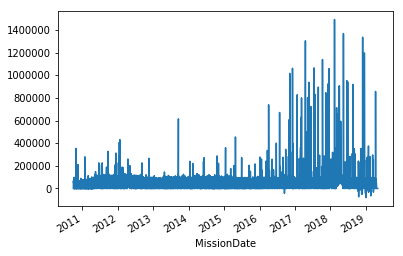

In [141]:
df['MissionTotalCost'].plot()

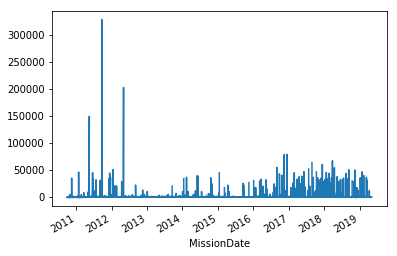

In [142]:
df['CostPerPassenger'].plot()

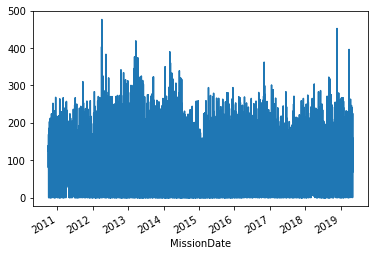

In [143]:
df['MissionPassengers'].plot()

In [144]:
df.columns

Index(['MissionID', 'MissionNumber', 'MsnTailNumber', 'MissionFY',
       'MissionMonth', 'MissionWeek', 'MsnStart', 'MsnStpOne', 'MsnStpTwo',
       'MsnStpThree', 'MsnStpFour', 'MsnStpFive', 'MsnStpSix', 'MsnStpSeven',
       'MsnStpEight', 'MsnEnd', 'msnDelayReason', 'msnCancelReason',
       'msnFlightODCCost', 'msnProposedFines', 'msnEnforcedFines',
       'msnGeneralFlightCost', 'msnFlightHoursPlanned', 'msnFlightHoursActual',
       'msnCharterDesignation', 'Status', 'msnVendor', 'msnInvoiceNumber',
       'MissionQuarter', 'MissionYear', 'MissionTotalCost',
       'MissionPassengers', 'LegPassengers', 'MissionUtilization',
       'LegUtilization', 'ManifestedPassengers', 'StruckPassengers',
       'PlannedMissionUtilization', 'CostPerPassenger'],
      dtype='object')

In [145]:
df['msnCharterDesignation'].value_counts()

IWA #3           2374
AEX #1           2073
SAT #1           2021
IWA #1           1972
AEX #2           1890
MIA              1703
IWA #2           1576
SAT #2           1308
BRO #1           1086
BRO #2            404
LRIC              230
SAT #3            135
MIRP               78
IWA #4             53
MIA #2             28
Cuba Contract      11
AEX #3              8
MIA #1              3
mirp                2
IWA3                1
Mia                 1
IWA#2               1
IWA#3               1
Iwa #2              1
Aex #2              1
sat #2              1
Name: msnCharterDesignation, dtype: int64

In [146]:
df.tail().T

MissionDate,2019-05-03 00:00:00,2019-05-03 00:00:00,2019-05-04 00:00:00,2019-05-04 00:00:00,2019-05-04 00:00:00
MissionID,48330,48331,48332,48334,48335
MissionNumber,191167,191168,191188,191228,191227
MsnTailNumber,N804TJ,N629SW,N529AU,N801WA,N441US
MissionFY,2019,2019,2019,2019,2019
MissionMonth,5,5,5,5,5
MissionWeek,18,18,18,18,18
MsnStart,KAEX,KAEX,KIWA,KBRO,KIWA
MsnStpOne,MHLM,KIAH,KMEM,KMSP,KDEN
MsnStpTwo,NaN,MSLP,NaN,KORD,NaN
MsnStpThree,NaN,NaN,NaN,KAEX,NaN


In [147]:
df['msnVendor'] = df['msnVendor'].str.upper()

In [148]:
df['msnVendor'].value_counts()

CSI                       8432
CAC                       1408
ACT                        226
ATS                         66
PJS                         19
ZEPHYR                      17
AIR PARTNER                 14
JEFT EDGE                    6
7962                         1
9003A                        1
AIR CHARTER SERVICE          1
VDI                          1
AIR AMBULACE                 1
8.92                         1
ATC                          1
-                            1
OCS                          1
6.05                         1
PEGASUS ELITE AVIATION       1
MIAMI AIR INTL               1
EXECUTIVE FLIGHTWAYS         1
ADVANCE AIR AMBULANCE        1
Name: msnVendor, dtype: int64

In [149]:
df['MsnTailNumber'] = df['MsnTailNumber'].str.upper()

In [150]:
df['MsnTailNumber'].value_counts().head(10)

N804WA    1079
N125MN    1008
N836NK     977
N806WA     866
N418US     855
N593AN     725
N43XA      712
N305FA     685
N803WA     649
N802WA     555
Name: MsnTailNumber, dtype: int64

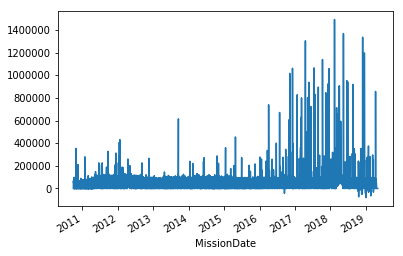

In [151]:
df['MissionTotalCost'].plot()

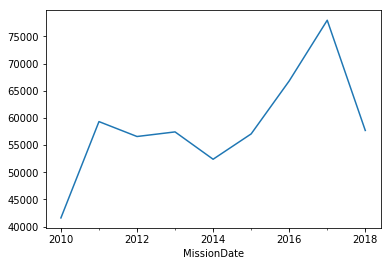

In [152]:
df['MissionTotalCost'].resample('AS-OCT').mean().plot()

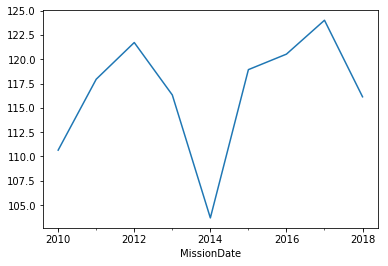

In [153]:
df['MissionPassengers'].resample('AS-OCT').mean().plot()

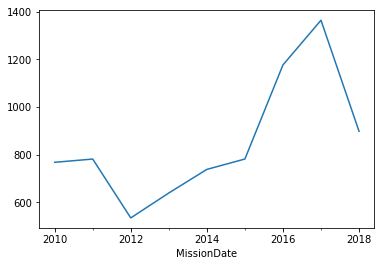

In [154]:
df['CostPerPassenger'].resample('AS-OCT').mean().plot()

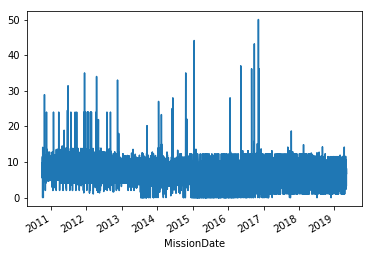

In [155]:
df['msnFlightHoursPlanned'].plot()

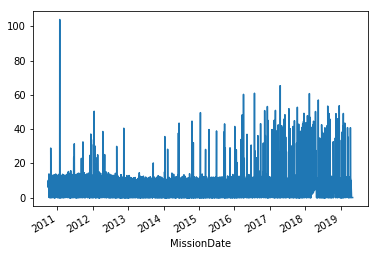

In [156]:
df['msnFlightHoursActual'].plot()

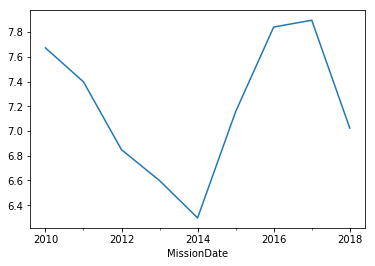

In [157]:
df['msnFlightHoursActual'].resample('AS-OCT').mean().plot()

In [158]:
df['CostPerFlightHour'] = df['MissionTotalCost'] / df['msnFlightHoursActual']
df['CostPerFlightHour'] = df['CostPerFlightHour'].replace([np.inf, -np.inf], np.nan)

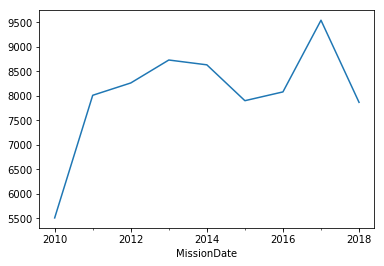

In [159]:
df['CostPerFlightHour'].resample('AS-OCT').mean().plot()

In [160]:
vendor = df.groupby('msnVendor')

In [161]:
vendor['CostPerFlightHour'].mean().sort_values(ascending=False)

msnVendor
AIR CHARTER SERVICE       455000.000000
MIAMI AIR INTL             12265.036332
AIR AMBULACE               10092.307692
CSI                         8525.645586
PEGASUS ELITE AVIATION      8250.655022
OCS                         8153.760252
ACT                         8039.399143
VDI                         7997.000000
7962                        7897.000000
6.05                        7891.362819
9003A                       7837.000000
CAC                         7754.022311
AIR PARTNER                 7734.987496
8.92                        7665.000000
ATC                         6674.480366
PJS                         6649.897983
ATS                         6604.582119
JEFT EDGE                   6531.085485
ZEPHYR                      4586.000000
-                                   NaN
ADVANCE AIR AMBULANCE               NaN
EXECUTIVE FLIGHTWAYS                NaN
Name: CostPerFlightHour, dtype: float64

In [196]:
vendor['CostPerPassenger'].median().sort_values(ascending=False)

msnVendor
AIR AMBULACE              328000.000000
ATC                        50993.030000
JEFT EDGE                  35629.672500
EXECUTIVE FLIGHTWAYS       35321.758333
ATS                        32611.682500
AIR PARTNER                32301.571429
PEGASUS ELITE AVIATION     31490.000000
PJS                        27071.470000
AIR CHARTER SERVICE        10111.111111
MIAMI AIR INTL              4027.949432
ZEPHYR                      2641.666667
OCS                          635.592295
6.05                         521.142475
CSI                          485.206842
CAC                          466.037234
7962                         464.110574
ACT                          450.139175
8.92                         409.500000
9003A                        262.460604
VDI                          242.871852
ADVANCE AIR AMBULANCE          0.000000
-                                   NaN
Name: CostPerPassenger, dtype: float64

In [163]:
vendor['MissionTotalCost'].median().sort_values(ascending=False).head(10)

msnVendor
AIR CHARTER SERVICE       455000.000
MIAMI AIR INTL            354459.550
AIR AMBULACE              328000.000
ATC                       305958.180
ATS                       253323.845
JEFT EDGE                 230478.510
AIR PARTNER               225958.115
PJS                       220811.450
EXECUTIVE FLIGHTWAYS      211930.550
PEGASUS ELITE AVIATION    188940.000
Name: MissionTotalCost, dtype: float64

In [166]:
vendor['msnFlightHoursActual'].median().sort_values(ascending=False).head(12)

msnVendor
ATC                       45.840
ATS                       37.715
JEFT EDGE                 36.650
PJS                       36.170
AIR AMBULACE              32.500
MIAMI AIR INTL            28.900
AIR PARTNER               27.500
PEGASUS ELITE AVIATION    22.900
OCS                        9.510
ACT                        7.920
8.92                       7.800
CAC                        7.450
Name: msnFlightHoursActual, dtype: float64

In [169]:
vendor['MissionID'].count().sort_values(ascending=False)

msnVendor
CSI                       8432
CAC                       1408
ACT                        226
ATS                         66
PJS                         19
ZEPHYR                      17
AIR PARTNER                 14
JEFT EDGE                    6
AIR AMBULACE                 1
6.05                         1
7962                         1
8.92                         1
9003A                        1
ADVANCE AIR AMBULANCE        1
ATC                          1
AIR CHARTER SERVICE          1
VDI                          1
EXECUTIVE FLIGHTWAYS         1
MIAMI AIR INTL               1
OCS                          1
PEGASUS ELITE AVIATION       1
-                            1
Name: MissionID, dtype: int64

In [173]:
sum(df['msnVendor'].isnull())

6765

In [174]:
len(df)

16967

In [195]:
df.groupby([pd.Grouper(freq='AS-OCT'), 'msnVendor'])['MissionID'].count().unstack().T

MissionDate,2010-10-01 00:00:00,2011-10-01 00:00:00,2012-10-01 00:00:00,2013-10-01 00:00:00,2014-10-01 00:00:00,2015-10-01 00:00:00,2016-10-01 00:00:00,2017-10-01 00:00:00,2018-10-01 00:00:00
msnVendor,,,,,,,,,
-,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
6.05,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
7962,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
8.92,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
9003A,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
ACT,NaN,NaN,119.0,107.0,NaN,NaN,NaN,NaN,NaN
ADVANCE AIR AMBULANCE,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AIR AMBULACE,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AIR CHARTER SERVICE,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
